## Имитация систем непрерывных и дискретных случайных величин

### Система Непрерывных СВ

In [1]:
import math
import random
import numpy as np
import scipy.stats as st
import sympy as sp
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.set_printoptions(suppress=True)

In [2]:
left_bound = 0
right_bound = np.inf

x, y = sp.symbols('x y')
str_f = "exp(-x-y)"
f = expr = sp.sympify(str_f)
f_xy = sp.lambdify((x, y), f)

print("f(x, y):")
display(f)


f(x, y):


exp(-x - y)

In [3]:
f_x, f_y = [sp.integrate(f, (val, left_bound, right_bound)) for val in (y, x)] 

print("f(x):")
display(f_x)
print("f(y):")
display(f_y)

print(f"Variable independency: {f == sp.simplify(f_x * f_y)}")

f(x):


exp(-x)

f(y):


exp(-y)

Variable independency: True


In [4]:
f_xy = sp.simplify(f / f_y)
f_yx = sp.simplify(f / f_x)

print("f(x/y):")
display(f_xy)
print("f(y/x):")
display(f_yx)


f(x/y):


exp(-x)

f(y/x):


exp(-y)

In [5]:
f_xy = lambda x, y: np.exp(-x-y)
fx, fy = lambda x: np.exp(-x), lambda y: np.exp(-y)
xa, xb = 0, 10
ya, yb = 0, 10
mx = my = 1
dx = dy = 1
zmax = f_xy(0, 0)

t = sp.symbols('t')
F1 = sp.integrate(f_x, (x, left_bound, t))
F_x_expr = sp.solve(F1 - x, t)[0]
F_x = sp.lambdify(x, F_x_expr)


F2 = sp.integrate(f_y, (y, left_bound, t))
F_y_expr = sp.solve(F2 - y, t)[0]
F_y = sp.lambdify(y, F_y_expr)

print("Inv. functions: ")
display(F_x_expr)
display(F_y_expr)


def method_of_inverse_functions(F_x, F_y, count):
    return generate_values(F_x, count), generate_values(F_y, count)


def generate_values(f_substitytion, count):
    generated_values = []
    
    for i in range(count):
        rand_number = random.random()
        generated_values.append(float(f_substitytion(rand_number)))    
    
    return generated_values


N = 1000000

Inv. functions: 


log(-1/(x - 1))

log(-1/(y - 1))

In [12]:
def plot_graphic(vector_x, vector_y, convergence, xlabel, ylabel):
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(vector_x, vector_y)
    plt.axhline(convergence, color='red', linestyle="--")
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def values_estimation(seq, theor_exp_val, variable):
    n_val, exp_val = [], []
    
    for n in range(100, len(seq) + 1, 10000):
        n_val.append(n)
        exp_val.append(np.mean(seq[:n]))
    
    plot_graphic(n_val, exp_val, convergence=theor_exp_val,
                 xlabel='Numbers',
                 ylabel=f'M[{variable}]')

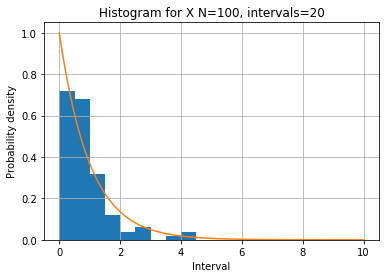

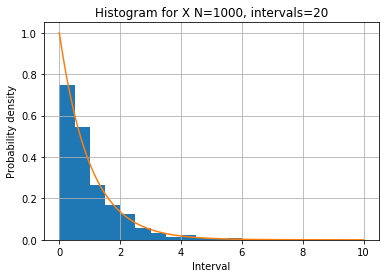

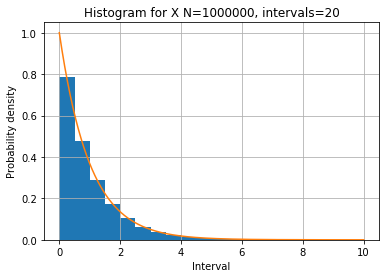

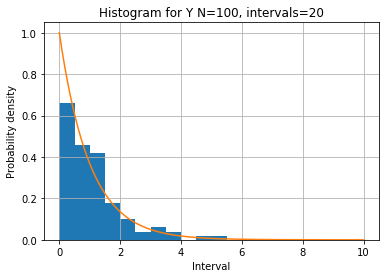

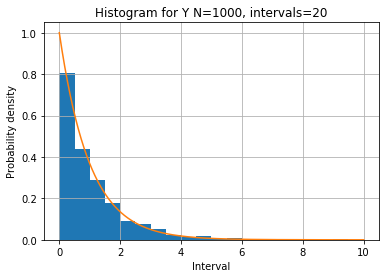

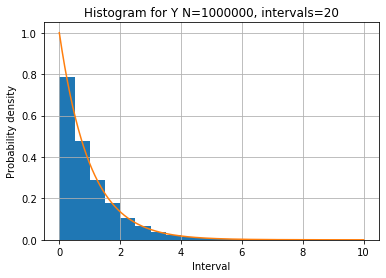

In [13]:
def histogram_estimation(seq, convergence, boundaries, random_var_name, bins=20):
    xa, xb = boundaries
    
    h = (xb - xa) / 1000
    vector_x = np.arange(xa, xb + h, h)
    vector_y = [convergence(x) for x in vector_x]
    plot_convergence = lambda: plt.plot(vector_x, vector_y)

    for n in (100, 1000, len(seq)):
        plt.hist(seq[:n], bins=bins, range=boundaries, density=True)
        plot_convergence()
        plt.grid()
        plt.title(f'Histogram for {random_var_name} N={n}, intervals={bins}')
        plt.xlabel('Interval')
        plt.ylabel('Probability density')
        plt.show()

    
seq_x, seq_y = method_of_inverse_functions(F_x, F_y, N)
histogram_estimation(seq_x, fx, (xa, xb), random_var_name='X')
histogram_estimation(seq_y, fy, (ya, yb), random_var_name='Y')

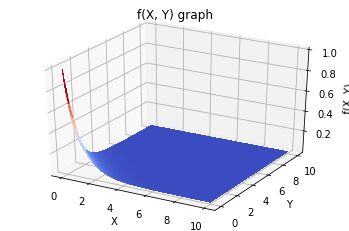

In [14]:
def print_theor_graph(bins=20):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    vector_x = np.arange(xa, xb, (xb - xa) / 1000)
    vector_y = np.arange(ya, yb, (yb - ya) / 1000)
    vector_x, vector_y = np.meshgrid(vector_x, vector_y)
    vector_z = f_xy(vector_x.ravel(), vector_y.ravel()).reshape(vector_x.shape)
    surf = ax.plot_surface(vector_x, vector_y, vector_z, cmap=matplotlib.cm.coolwarm, antialiased=False)
    plt.title('f(X, Y) graph')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(X, Y)')
    plt.show()
    
print_theor_graph()

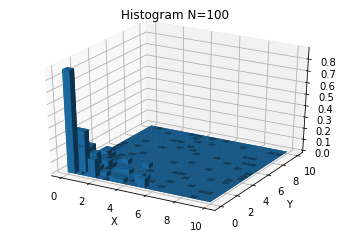

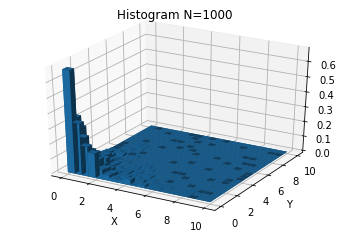

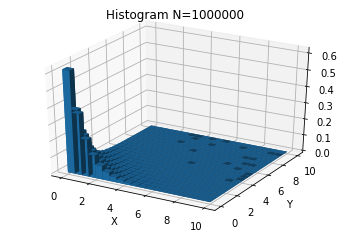

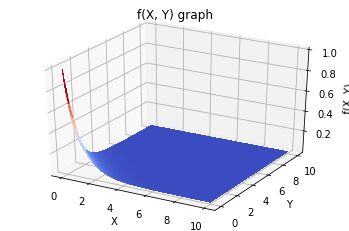

In [15]:
def histogram2d_estimation(pxy, boundaries, print_theor_graph, bins=20):
    seq_x, seq_y = method_of_inverse_functions(F_x, F_y, N)
    
    for n in (100, 1000, len(seq_x)):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        hist, xedges, yedges = np.histogram2d(seq_x[:n], seq_y[:n], bins=bins, range=boundaries, density=True)
        xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing='ij')
        xpos, ypos, zpos = xpos.ravel(), ypos.ravel(), 0
        dx, dy, dz = (xb - xa) / bins, (yb - ya) / bins, hist.ravel()
        ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
        plt.title(f'Histogram N={n}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        plt.show()

        
histogram2d_estimation(f_xy, ((xa, xb), (ya, yb)), print_theor_graph)
print_theor_graph()

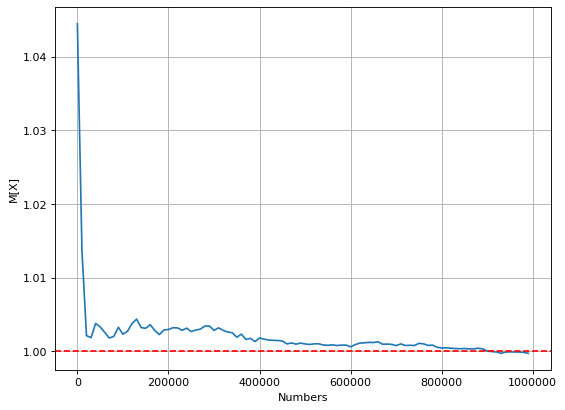

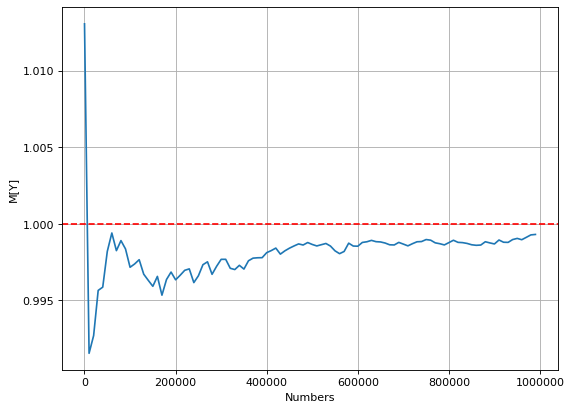

In [16]:
seq_x, seq_y = method_of_inverse_functions(F_x, F_y, N)
values_estimation(seq_x, mx, variable='X')
values_estimation(seq_y, my, variable='Y')

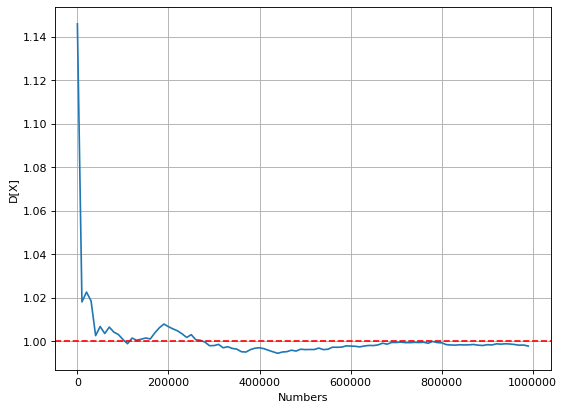

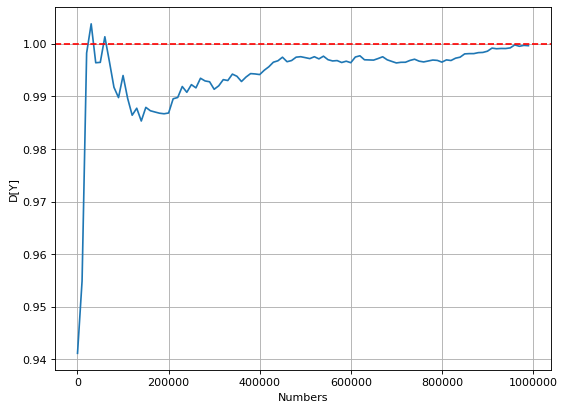

In [17]:
def variances_estimation(seq, theor_variance, variable):
    n_val, variances = [], []
    for n in range(100, len(seq), 10000):
        n_val.append(n)
        variances.append(np.var(seq[:n]))
    
    plot_graphic(n_val, variances, convergence=theor_variance,
                 xlabel='Numbers',
                 ylabel=f'D[{variable}]')


seq_x, seq_y = method_of_inverse_functions(F_x, F_y, N)

variances_estimation(seq_x, dx, variable='X')
variances_estimation(seq_y, dy, variable='Y')

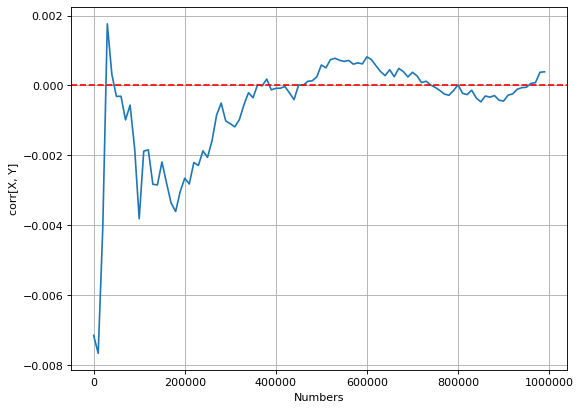

In [18]:
def correlation_estimation(theor_correlation):
    seq_x, seq_y = method_of_inverse_functions(F_x, F_y, N)
    
    n_val, correlation = [], []
    for n in range(100, len(seq_y), 10000):
        n_val.append(n)
        correlation.append(np.corrcoef(np.vstack((seq_x[:n], seq_y[:n])))[0][1])
    
    plot_graphic(n_val, correlation, convergence=theor_correlation,
                 xlabel='Numbers',
                 ylabel=f'corr[X, Y]')
    
correlation_estimation(0)

In [20]:
def M_pointed(values, amount): 
    return sum(values) / amount

def D_pointed(values, m_x, amount): 
    return sum([(values[i] - m_x) ** 2 for i in range(amount)]) / (amount - 1)

def K_pointed(x_values, y_values, m_x, m_y, amount):
    return sum([(x_values[i] - m_x) * (y_values[i] - m_y) for i in range(amount)]) / (amount - 1)

#### Точечные оценки:

Точечная оценка мат. ожидания:

\begin{equation*}
m_x^* = \frac{1} n \sum_{i=1}^n x_i
\end{equation*}

Точечная оценка дисперсии:

\begin{equation*}
D = \frac{1}{n-1} \sum_{i=1}^n{\left( x_i - m_x^* \right)}^2
\end{equation*}

In [21]:
x_val, y_val = method_of_inverse_functions(F_x, F_y, N)
m_x_pointed, m_y_pointed = M_pointed(x_val, N), M_pointed(y_val, N)

print("M[x]:", m_x_pointed)
print("M[y]:", m_y_pointed)

d_x_pointed, d_y_pointed = D_pointed(x_val, m_x_pointed, N), D_pointed(y_val, m_y_pointed, N)
print("D[x]:", d_x_pointed)
print("D[y]:", d_y_pointed)

r_xy_pointed = K_pointed(x_val, y_val, m_x_pointed, m_y_pointed, N) / (math.sqrt(d_x_pointed) * math.sqrt(d_y_pointed)) 
print("corr[xy]:", r_xy_pointed)

M[x]: 0.9994788463141869
M[y]: 0.999043595667838
D[x]: 0.9967130356816075
D[y]: 1.0005862992294239
corr[xy]: 0.0014457775727086174


In [23]:
def m_confidence_interval(x_val, m_x, d_x, N, confidence_level = 0.95):
    normal_quantil = st.norm.ppf(confidence_level)
    return [m_x - np.sqrt(d_x / N) * normal_quantil, m_x + np.sqrt(d_x / N) * normal_quantil]

def d_confidence_interval(x_val, d_x, N, confidence_level = 0.95):
    chi_mass = st.chi2(N - 1)
    array = chi_mass.rvs(N)
    quantiles = st.mstats.mquantiles(array, prob = [(1 - confidence_level)/2, (1 + confidence_level)/2])
    xi_plus, xi_minus = quantiles[0], quantiles[1]
    return ((N - 1) * d_x / xi_minus, (N - 1) * d_x / xi_plus)


def r_to_z(r):
    return np.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_confidence_interval(r, n, alpha):
    z = r_to_z(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = st.norm.ppf(1 - alpha/2)

    lo = z - z_crit * se
    hi = z + z_crit * se

    return (z_to_r(lo), z_to_r(hi))

#### Доверительные интервалы:

Доверительный интервал для Мат. ожидания

\begin{equation*}
m_x^* - \frac{D \cdot t_{\gamma,n-1}}{\sqrt{n-1}} \leq m_x \le m_x^* + \frac{D \cdot t_{\gamma,n-1}}{\sqrt{n-1}}
\end{equation*}

Доверительный интервал для Дисперсии.

\begin{equation*}
\frac{nD}{\chi_{\frac{1-\gamma}{2}, n-1}^2} \leq D_x < \frac{nD}{\chi_{\frac{1+\gamma}{2}, n-1}^2}
\end{equation*}

Доверительный интервал для коэф. корреляции:

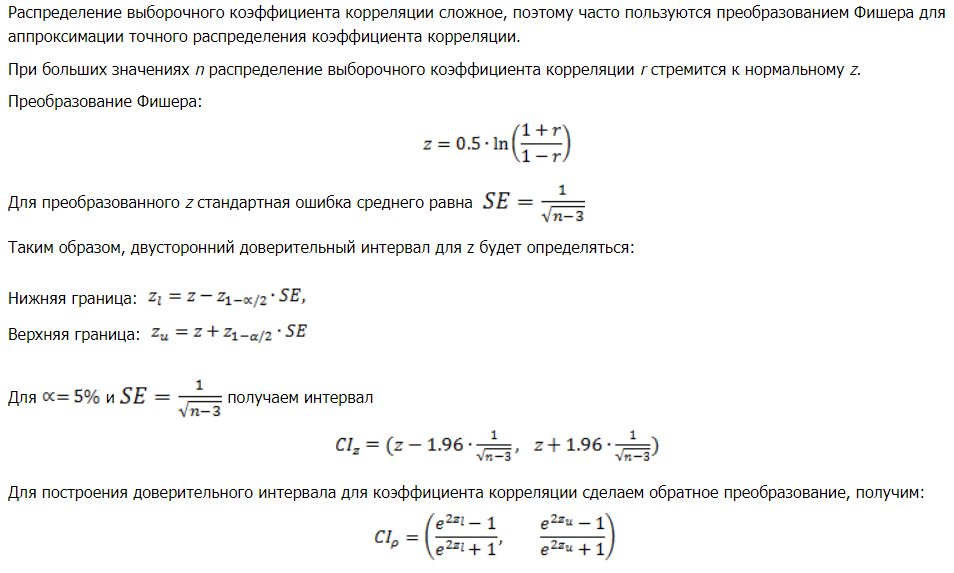

In [32]:
M_x_intervals = m_confidence_interval(x_val, m_x_pointed, d_x_pointed, N, confidence_level = 0.95)
print('M[X]: ', M_x_intervals)
M_y_intervals = m_confidence_interval(y_val, m_y_pointed, d_y_pointed, N, confidence_level = 0.95)
print('M[Y]: ', M_y_intervals)

D_x_intervals = d_confidence_interval(x_val, d_x_pointed, N, confidence_level = 0.95)
print('D[X]: ', D_x_intervals)
D_y_intervals = d_confidence_interval(y_val, d_y_pointed, N, confidence_level = 0.95)
print('D[Y]: ', D_y_intervals)

R_x_intervals = r_confidence_interval(r_xy_pointed, N, alpha=0.1)
print('corr[X]: ', R_x_intervals)

M[X]:  [0.9830573651711842, 1.0159003274571896]
M[Y]:  [0.9825902382228126, 1.0154969531128633]
D[X]:  (0.9693804838318633, 1.0250671922847145)
D[Y]:  (0.9727924162441012, 1.0285536075419268)
corr[X]:  (-0.015004099450430172, 0.017894872181075744)


### Система Дискретных СВ

In [26]:
def discrete_expected_value(parr):
    return sum([(i - 1) * p for i, p in enumerate(parr)])


def discrete_variance(parr):
    exp_val = discrete_expected_value(parr)
    return sum([((i - 1) - exp_val) ** 2 * p for i, p in enumerate(parr)])

def check_independence(px, py, pxy):
    return all([pxy[j][i] == px[i] * py[j] for i in range(len(px)) for j in range(len(py))])


def conditional_distribution_density(pxy, p_list):
    return [[pij / p for pij in pxy[index]] for index, p in enumerate(p_list)]

In [27]:
px = [0.005, 0.045, 0.15, 0.6, 0.15, 0.045, 0.005]
xa, xb = 0, len(px) - 1
py = [0.3, 0.15, 0.048, 0.004, 0.048, 0.15, 0.3]
ya, yb = 0, len(py) - 1
pxy = [[i * j for i in px] for j in py]
fx = np.cumsum(px)[:-1]
fy = np.cumsum(py)[:-1]
mx, my = discrete_expected_value(px), discrete_expected_value(py)
dx, dy = discrete_variance(px), discrete_variance(py)
kxy = 0

In [28]:
print("Probability matrix")
print(np.array(pxy))
print("\nF(x) =", fx)
print("F(y) =", fy)
print("\nM[x]:", mx, "M[y]:", my)
print("D[x]:", dx, "D[y]:", dy)
print(f"Variable independency: {check_independence(px, py, pxy)}")

Probability matrix
[[0.0015  0.0135  0.045   0.18    0.045   0.0135  0.0015 ]
 [0.00075 0.00675 0.0225  0.09    0.0225  0.00675 0.00075]
 [0.00024 0.00216 0.0072  0.0288  0.0072  0.00216 0.00024]
 [0.00002 0.00018 0.0006  0.0024  0.0006  0.00018 0.00002]
 [0.00024 0.00216 0.0072  0.0288  0.0072  0.00216 0.00024]
 [0.00075 0.00675 0.0225  0.09    0.0225  0.00675 0.00075]
 [0.0015  0.0135  0.045   0.18    0.045   0.0135  0.0015 ]]

F(x) = [0.005 0.05  0.2   0.8   0.95  0.995]
F(y) = [0.3   0.45  0.498 0.502 0.55  0.7  ]

M[x]: 1.9999999999999998 M[y]: 2.0
D[x]: 0.7499999999999999 D[y]: 6.696
Variable independency: True


In [29]:
print("Conditional distribution density (p_xy/p_x):")
np.array(conditional_distribution_density(pxy, px))

Conditional distribution density (p_xy/p_x):


array([[ 0.3       ,  2.7       ,  9.        , 36.        ,  9.        ,
         2.7       ,  0.3       ],
       [ 0.01666667,  0.15      ,  0.5       ,  2.        ,  0.5       ,
         0.15      ,  0.01666667],
       [ 0.0016    ,  0.0144    ,  0.048     ,  0.192     ,  0.048     ,
         0.0144    ,  0.0016    ],
       [ 0.00003333,  0.0003    ,  0.001     ,  0.004     ,  0.001     ,
         0.0003    ,  0.00003333],
       [ 0.0016    ,  0.0144    ,  0.048     ,  0.192     ,  0.048     ,
         0.0144    ,  0.0016    ],
       [ 0.01666667,  0.15      ,  0.5       ,  2.        ,  0.5       ,
         0.15      ,  0.01666667],
       [ 0.3       ,  2.7       ,  9.        , 36.        ,  9.        ,
         2.7       ,  0.3       ]])

In [30]:
print("Conditional distribution density (p_xy/p_y):")
np.array(conditional_distribution_density(pxy, py))

Conditional distribution density (p_xy/p_y):


array([[0.005, 0.045, 0.15 , 0.6  , 0.15 , 0.045, 0.005],
       [0.005, 0.045, 0.15 , 0.6  , 0.15 , 0.045, 0.005],
       [0.005, 0.045, 0.15 , 0.6  , 0.15 , 0.045, 0.005],
       [0.005, 0.045, 0.15 , 0.6  , 0.15 , 0.045, 0.005],
       [0.005, 0.045, 0.15 , 0.6  , 0.15 , 0.045, 0.005],
       [0.005, 0.045, 0.15 , 0.6  , 0.15 , 0.045, 0.005],
       [0.005, 0.045, 0.15 , 0.6  , 0.15 , 0.045, 0.005]])

In [43]:
import bisect
import scipy.stats as sta

def discrete_generator(n):
    seq_x, seq_y = [], []
    
    for _ in range(n):
        xp = random.random()
        yp = random.random()
        
        seq_x.append(bisect.bisect_left(fx, xp) - 1)
        seq_y.append(bisect.bisect_left(fy, yp) - 1)
    
    return seq_x, seq_y

x_list, y_list = discrete_generator(10000)
N = 10000

#### Точечные оценки:

In [44]:
m_x_pointed, m_y_pointed = M_pointed(x_list, N), M_pointed(y_list, N)
print("M[x]:", m_x_pointed)
print("M[y]:", m_y_pointed)

d_x_pointed, d_y_pointed = D_pointed(x_list, m_x_pointed, N), D_pointed(y_list, m_y_pointed, N)
print("D[x]:", d_x_pointed)
print("D[y]:", d_y_pointed)

r_xy_pointed = K_pointed(x_list, y_list, m_x_pointed, m_y_pointed, N) / (math.sqrt(d_x_pointed) * math.sqrt(d_y_pointed)) 
print("corr[xy]:", r_xy_pointed)


M[x]: 2.018
M[y]: 1.987
D[x]: 0.7605520552054031
D[y]: 6.692900290029094
corr[xy]: 0.012293747620925324


#### Доверительные интервалы

In [45]:
M_x_intervals = m_confidence_interval(x_val, m_x_pointed, d_x_pointed, N, confidence_level = 0.95)
print('M[X]: ', M_x_intervals)
M_y_intervals = m_confidence_interval(y_val, m_y_pointed, d_y_pointed, N, confidence_level = 0.95)
print('M[Y]: ', M_y_intervals)

D_x_intervals = d_confidence_interval(x_val, d_x_pointed, N, confidence_level = 0.95)
print('D[X]: ', D_x_intervals)
D_y_intervals = d_confidence_interval(y_val, d_y_pointed, N, confidence_level = 0.95)
print('D[Y]: ', D_y_intervals)

R_x_intervals = r_confidence_interval(r_xy_pointed, N, alpha=0.1)
print('corr[X]: ', R_x_intervals)

M[X]:  [2.003655291447855, 2.0323447085521447]
M[Y]:  [1.9444465834878075, 2.0295534165121927]
D[X]:  (0.740357575048966, 0.7819826173307132)
D[Y]:  (6.513992471388656, 6.887590942053691)
corr[X]:  (-0.0041566131457963324, 0.028737456343336444)


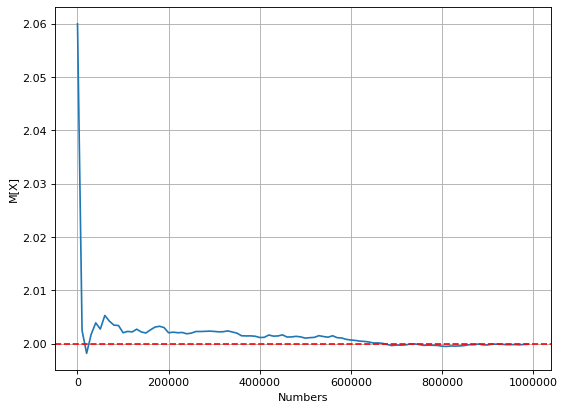

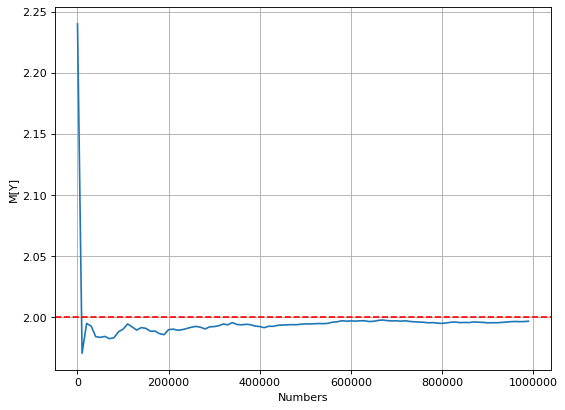

In [37]:
def values_estimation(seq, theor_exp_val, variable):
    n_val, exp_val = [], []
    for n in range(100, len(seq), 10000):
        n_val.append(n)
        exp_val.append(np.mean(seq[:n]))
    
    plot_graphic(n_val, exp_val, convergence=theor_exp_val,
                 xlabel='Numbers',
                 ylabel=f'M[{variable}]')


seq_x, seq_y = discrete_generator(1000000)

values_estimation(seq_x, mx, variable='X')
values_estimation(seq_y, my, variable='Y')

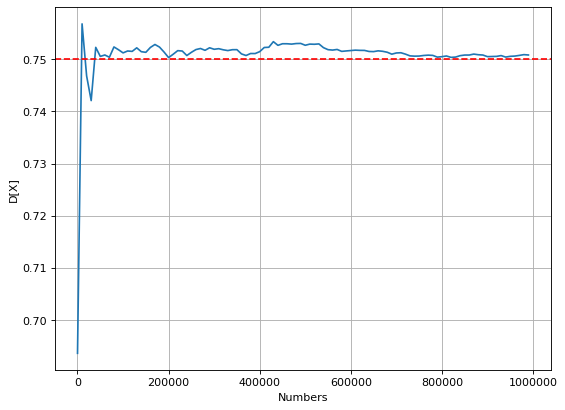

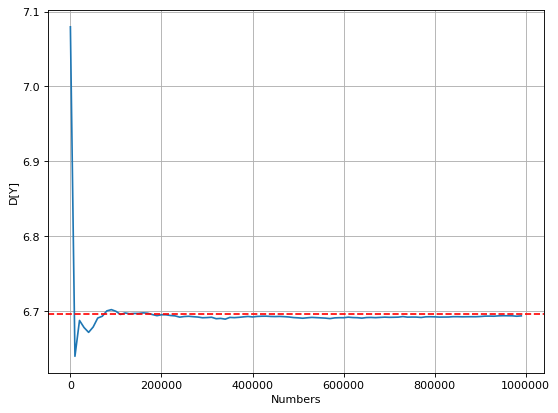

In [39]:
def variances_estimation(seq, theor_variance, variable):
    n_val, variances = [], []
    for n in range(100, len(seq), 10000):
        n_val.append(n)
        variances.append(np.var(seq[:n]))
    
    plot_graphic(n_val, variances, convergence=theor_variance,
                 xlabel='Numbers',
                 ylabel=f'D[{variable}]')


seq_x, seq_y = discrete_generator(1000000)
variances_estimation(seq_x, dx, variable='X')
variances_estimation(seq_y, dy, variable='Y')


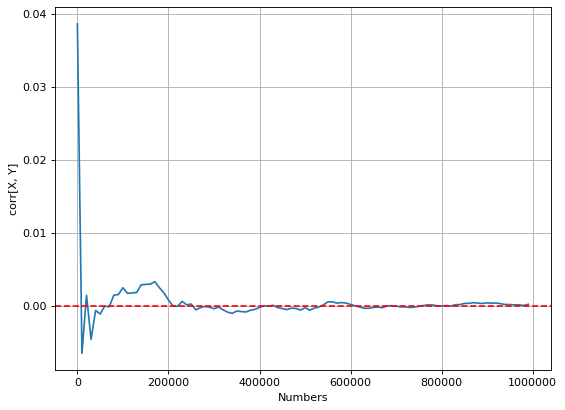

In [42]:
seq_x, seq_y = discrete_generator(1000000)

n_val, correlation = [], []
for n in range(100, len(seq_y), 10000):
    n_val.append(n)
    correlation.append(np.corrcoef(np.vstack((seq_x[:n], seq_y[:n])))[0][1])

plot_graphic(n_val, correlation, convergence=0,
             xlabel='Numbers',
             ylabel=f'corr[X, Y]')

In [43]:
def histogram_estimation(seq, convergence, boundaries, random_var_name, bins=20):
    xa, xb = boundaries
    plot_convergence = lambda: plt.hist(np.arange(xa, xb + 1), bins=bins, range=boundaries,
                                        density=True, weights=convergence, histtype='stepfilled',
                                        facecolor='none', edgecolor='red', linestyle='--')

    for n in (100, 1000, len(seq)):
        plt.hist(seq[:n], bins=bins, range=boundaries, density=True)
        plot_convergence()
        plt.grid()
        plt.title(f'Histogram for {random_var_name} N={n}')
        plt.xlabel('Generate numbers interval')
        plt.ylabel('Probability density')
        plt.show()


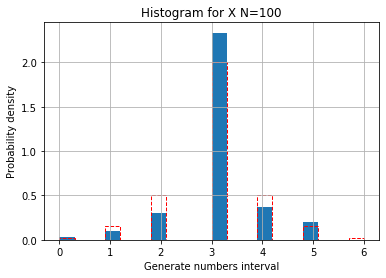

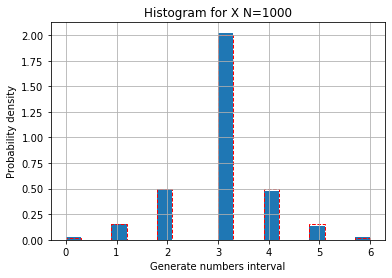

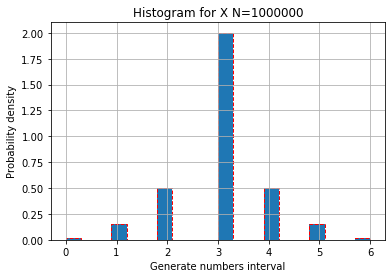

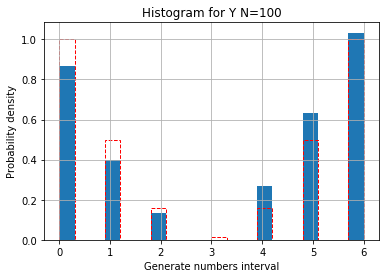

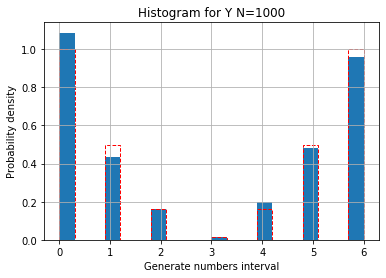

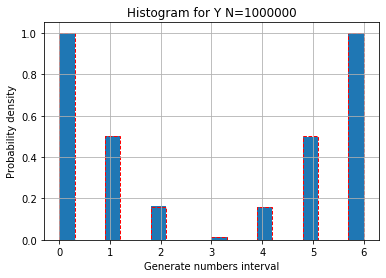

In [44]:
seq_x, seq_y = discrete_generator(1000000)
seq_x, seq_y = [x + 1 for x in seq_x], [y + 1 for y in seq_y]

histogram_estimation(seq_x, px, (xa, xb), random_var_name='X')
histogram_estimation(seq_y, py, (ya, yb), random_var_name='Y')

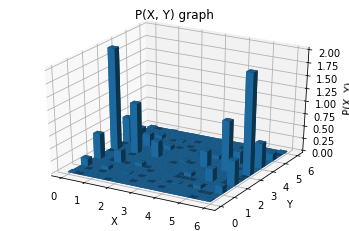

In [59]:
def print_theor_graph(bins=20):
    vector_x, vector_y = np.meshgrid(np.arange(len(pxy)), np.arange(len(pxy[0])), indexing='ij')
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    hist, xedges, yedges = np.histogram2d(vector_x.ravel(), vector_y.ravel(), bins=bins, range=((xa, xb), (ya, yb)),
                                          density=True, weights=np.array(pxy).ravel())
    dx, dy, dz = (xb - xa)/bins, (yb - ya)/bins, hist.ravel()
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing='ij')
    xpos, ypos, zpos = xpos.ravel(), ypos.ravel(), 0
    
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
    plt.title('P(X, Y) graph')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('P(X, Y)')
    plt.show()

print_theor_graph()

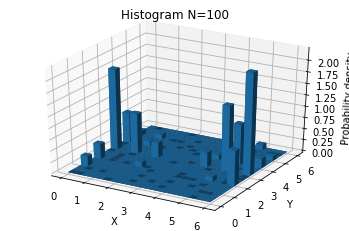

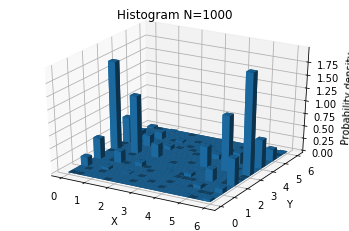

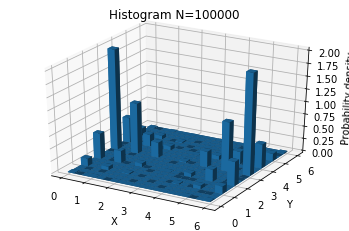

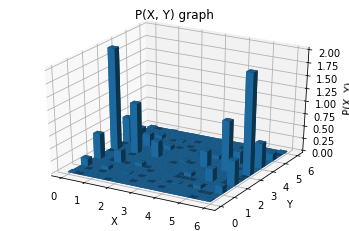

In [60]:
seq_y, seq_x = discrete_generator(100000)
seq_x, seq_y = [x + 1 for x in seq_x], [y + 1 for y in seq_y]

for n in (100, 1000, len(seq_x)):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    hist, xedges, yedges = np.histogram2d(seq_x[:n], seq_y[:n], bins=20, range=((xa, xb), (ya, yb)), density=True)
    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing='ij')
    xpos, ypos, zpos = xpos.ravel(), ypos.ravel(), 0
    dx, dy, dz = (xb - xa) / 20, (yb - ya) / 20, hist.ravel()
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
    plt.title(f'Histogram N={n}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Probability density')
    plt.show()
    
print_theor_graph()